# Scope and description

The data created by this notebook is for testing an object containing multiple diverse spatial elements.

Elements contained:
- 2D single-scale image (cyx);
- 2D multi-scale image (cyx);
- 2D single-scale labels (yx);
- 2D multi-scale labels (yx);
- 2D points;
- circles;
- polygons;
- multipolygons.

Annotations contained:
- table annotating the 2D labels.

Note, this object is not meant to contain everything, example of features that are not covered by this notebook are:
- multiple transformations (transformation here are all `Identity()`);
- 3D images, labels, points
- channel names for images
- table annotating multiple elements
- elements containing annotation columns

# Prepare the data

In [1]:
import warnings

# warnings clutter the diffs of notebooks
warnings.filterwarnings("ignore")

In [2]:
NAME = "multiple_elements"

In [3]:
import spatialdata as sd
import spatialdata_plot
from io_utils import delete_old_data, write_sdata_and_check_consistency
from spatialdata.datasets import blobs

delete_old_data(name=NAME)
sdata = blobs(length=64)
sdata

SpatialData object
├── Images
│     ├── 'blobs_image': DataArray[cyx] (3, 64, 64)
│     └── 'blobs_multiscale_image': DataTree[cyx] (3, 64, 64), (3, 32, 32), (3, 16, 16)
├── Labels
│     ├── 'blobs_labels': DataArray[yx] (64, 64)
│     └── 'blobs_multiscale_labels': DataTree[yx] (64, 64), (32, 32), (16, 16)
├── Points
│     └── 'blobs_points': DataFrame with shape: (<Delayed>, 4) (2D points)
├── Shapes
│     ├── 'blobs_circles': GeoDataFrame shape: (5, 2) (2D shapes)
│     ├── 'blobs_multipolygons': GeoDataFrame shape: (2, 1) (2D shapes)
│     └── 'blobs_polygons': GeoDataFrame shape: (5, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (10, 3)
with coordinate systems:
    ▸ 'global', with elements:
        blobs_image (Images), blobs_multiscale_image (Images), blobs_labels (Labels), blobs_multiscale_labels (Labels), blobs_points (Points), blobs_circles (Shapes), blobs_multipolygons (Shapes), blobs_polygons (Shapes)

# Read-write and IO validation

In [4]:
import logging

logging.getLogger("ome_zarr").setLevel(logging.ERROR)

write_sdata_and_check_consistency(sdata=sdata, name=NAME)

INFO     The Zarr backing store has been changed from None the new file path: multiple_elements.zarr               


# Plot the data

## Single scale images, single scale labels, points

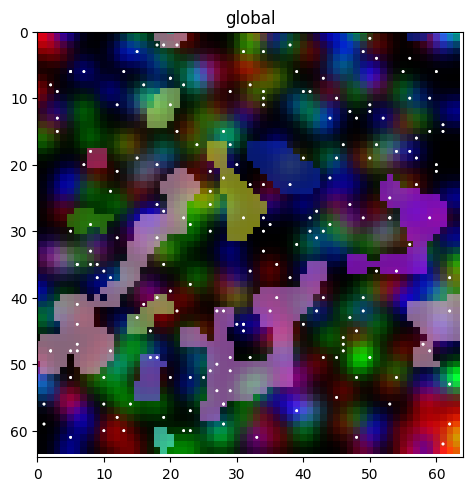

In [5]:
sdata.pl.render_images("blobs_image").pl.render_labels("blobs_labels").pl.render_points(
    "blobs_points", na_color="w"
).pl.show()

## Lables annoted by the table (var)

In [6]:
sdata["table"].obs

,instance_id,region
3,3,blobs_labels
4,4,blobs_labels
5,5,blobs_labels
8,8,blobs_labels
10,10,blobs_labels
11,11,blobs_labels
12,12,blobs_labels
13,13,blobs_labels
15,15,blobs_labels
16,16,blobs_labels


In [7]:
sdata["table"].var_names

Index(['channel_0_sum', 'channel_1_sum', 'channel_2_sum'], dtype='object')

In [8]:
# BUG: https://github.com/scverse/spatialdata-plot/issues/165
# sdata.pl.render_labels("blobs_labels", color="channel_0_sum").pl.show()

## Shapes: circles, polygons, multipolygons

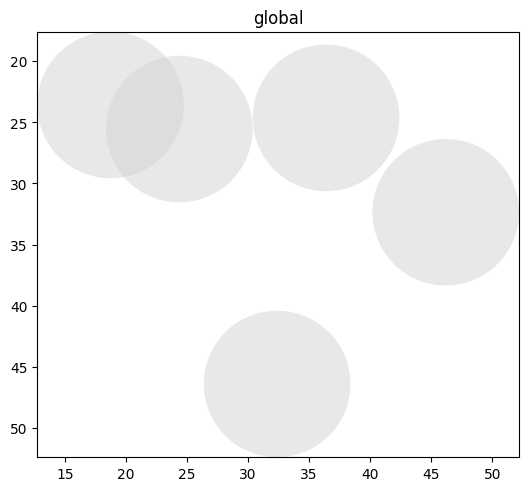

In [9]:
sdata.pl.render_shapes("blobs_circles", fill_alpha=0.5).pl.show()

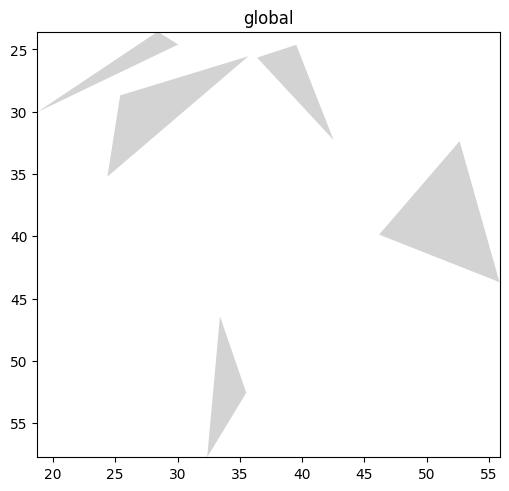

In [10]:
sdata.pl.render_shapes("blobs_polygons").pl.show()

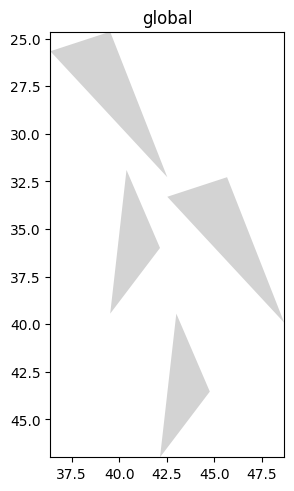

In [11]:
sdata.pl.render_shapes("blobs_multipolygons").pl.show()